In [1]:
import os, sys
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import torch
import pandas as pd 
import seaborn as sn
from sklearn.metrics import confusion_matrix

# 0. Prepare Data

### Training data includes all gesture recordings from subject_1 at all wearing locations

In [2]:
os.chdir("/home/laiy/gitrepos/msr_final/LongTermEMG_myo")
from PrepareAndLoadData.process_data import read_data_training

In [3]:
data_dir = "/home/laiy/gitrepos/msr_final/Wearable_Sensor_Long-term_sEMG_Dataset/data"
processed_data_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Processed_datasets_one_subject"
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
save_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Results"

path_TSD ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_loc_one_subject/TSD"
save_TSD = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

In [4]:
# read_data_training(path=data_dir, store_path = processed_data_dir, num_participant=1)

In [5]:
# check stored pickle 
with open(processed_data_dir + "/training_session.pickle", 'rb') as f:
    dataset_training = pickle.load(file=f)

examples_datasets_train = dataset_training['examples_training']
print('traning examples ', np.shape(examples_datasets_train))
labels_datasets_train = dataset_training['labels_training']
print('traning labels ', np.shape(labels_datasets_train))

traning examples  (1, 3, 40, 572, 252)
traning labels  (1, 3, 40, 572)


In [6]:
num_kernels=[200, 200, 200]                        # model layer size 
number_of_cycles_total=np.shape(examples_datasets_train[0][0])[0]               # #session
print("number_of_cycles_total ", number_of_cycles_total)
number_of_classes=22
batch_size=128          
feature_vector_input_length=252                     # size of one example 
learning_rate=0.002515

number_of_cycles_total  40


# 1. TSD_DNN
* The outcome is only used for myo_ros project, so train examples with the standard model. 

In [7]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_standard import \
            test_TSD_DNN_on_training_sessions, train_fine_tuning

In [8]:
# train_fine_tuning(examples_datasets_train, labels_datasets_train,
#                   num_kernels=num_kernels, path_weight_to_save_to=path_TSD,
#                   number_of_classes=number_of_classes, number_of_cycles_total=number_of_cycles_total,
#                   batch_size=batch_size,
#                   feature_vector_input_length=feature_vector_input_length,
#                   learning_rate=learning_rate)

In [9]:
algo_name = "standard_TSD"
test_TSD_DNN_on_training_sessions(examples_datasets_train, labels_datasets_train,
                                  num_neurons=num_kernels, use_only_first_training=True,
                                  path_weights=path_TSD,
                                  feature_vector_input_length=feature_vector_input_length,
                                  save_path = save_TSD, algo_name=algo_name,
                                  number_of_cycles_total=number_of_cycles_total,
                                  number_of_classes=number_of_classes, cycle_for_test=3)

GET one participant_examples  (3, 40, 572, 252)
   GET one training_index_examples  (40, 572, 252)  at  0
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (5720, 252)    (5720, 252)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (5720, 252)    (5720, 252)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
   GET one training_index_examples  (40, 572, 252)  at  2
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (5720, 252)    (5720, 252)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
dataloaders: 
   train  (1, 3)
   valid  (1, 3)
   test  (1, 3)
0  SESSION   data =  5720
Participant:  0  Accuracy:  0.9470279720279721
1  SESSION   data =  5720
Partic

In [10]:
results_filename = save_TSD + '/predictions_' + algo_name + "_no_retraining.npy"
results = np.load(results_filename, allow_pickle=True)
TSD_acc = results[0]
TSD_acc_overall = np.mean(TSD_acc)
TSD_df = pd.DataFrame(TSD_acc.transpose(), 
                       index = [f'Session_{i}' for i in range(TSD_acc.shape[1])],
                        columns = [f'Participant_{j}' for j in range(TSD_acc.shape[0])])
TSD_df

,Participant_0
Session_0,0.947028
Session_1,0.683916
Session_2,0.672902


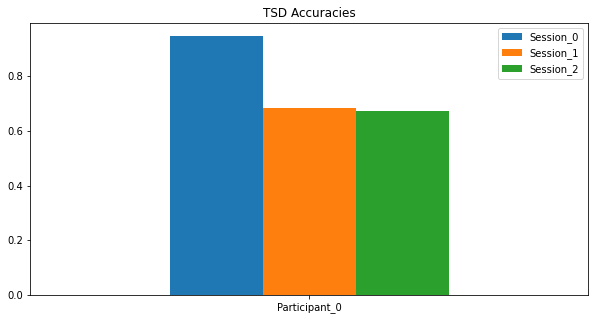

In [11]:
TSD_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("TSD Accuracies")
plt.show()

In [12]:
from TrainingsAndEvaluations.ForTrainingSessions.utils import get_gesture_accuracies

In [13]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
m_name = "Sub"
n_name = "Loc"
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name)
df = pd.read_csv(save_TSD+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 3)
predictions =  (1, 3)
accuracies_gestures =  (22, 3)


,Unnamed: 0,Sub0_Loc0,Sub0_Loc1,Sub0_Loc2
0,M0,1.000000,1.000000,1.000000
1,M1,1.000000,0.696154,0.838462
2,M2,0.957692,0.507692,0.976923
3,M3,0.946154,0.469231,0.980769
4,M4,0.926923,0.776923,0.326923
5,M5,0.988462,0.696154,0.953846
6,M6,1.000000,0.584615,0.738462
7,M7,0.988462,0.657692,0.238462
8,M8,1.000000,0.973077,0.930769
9,M9,0.988462,0.569231,0.669231


### Check training performance for one subject at neutral position
* It seems like the neutral wearing location has the best performance than other locations, so generate confusion matrix for this model.

In [14]:
cm = confusion_matrix(ground_truths[0][0], predictions[0][0], normalize='true')
print("Check confusion matrix size: ", np.shape(cm))

Check confusion matrix size:  (22, 22)


In [15]:
gestures_name = ['REST', 'WF', 'WE', 'RD', 'UD', 'FP', 'FS', 'HC', 'FP & WF', 'FP & WE',
                'FP & RD', 'FP & UD', 'FS & WF', 'FS & WE', 'FS & RD', 'FS & UD', 'HC & WF',
                'HC & WE', 'HC & RD', 'HC & UD', 'HC & FP', 'HC & FS']

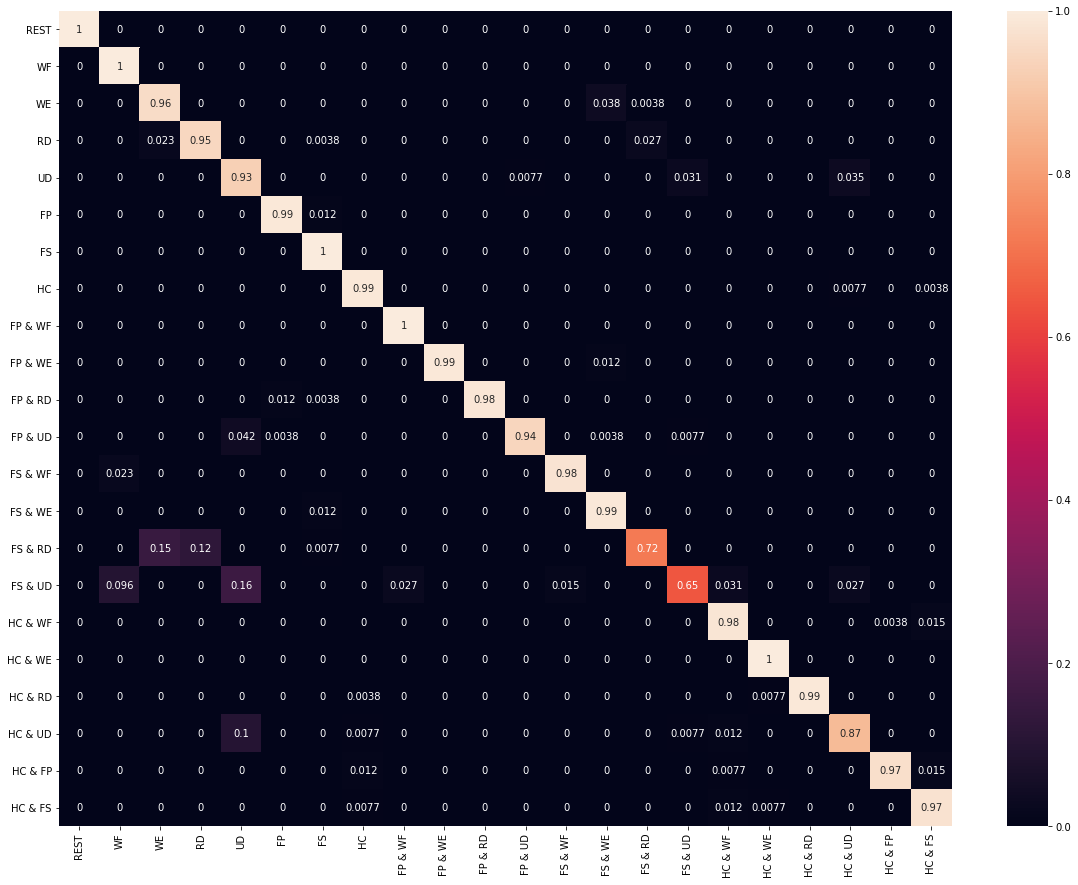

In [16]:
# https://stackoverflow.com/questions/5821125/how-to-plot-confusion-matrix-with-string-axis-rather-than-integer-in-python
df_cm = pd.DataFrame(cm, index = gestures_name, columns = gestures_name)
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

From the plot above, the four gestures that can are easy to interpret are:
* forearm pronation and wrist flexion (FP & WF)
* forearm pronation and wrist extension (FP & WE)
* forearm pronation and radial deviation (FP & RD)
* forearm pronation and ulnar deviation (FP & UD)

But after trying multiple combinations on myself, the four most classifiable gestures are:
* wrist flexion (WF)
* forearm pronation and wrist extension (FP & WE)
* radial deviation (RD)
* ulnar deviation (UD)

However, WF and FP&WE are not very accurate when predicting on dynamic forearms. WF is often confused with RD, and FP&WE is often confused with UD. The default calssifier on myo is used to double check on the prediction outputs. The logic is as follows:   
* if the longterm_myo model outputs RD or UD and if the default model is WAVE_IN or WAVE_OUT, outputs prediction from the default classifier;
* otherwise, outputs prediction from the longterm_myo model
